<a href="https://colab.research.google.com/github/kenza-c/M2BIGDATA/blob/main/kenza2_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install textblob-fr


In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# Téléchargez l'ensemble de mots vides
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import spacy
from spacy.lang.fr.stop_words import STOP_WORDS
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
reclamations=pd.read_csv("reclamation_new_vf.csv")

In [4]:
reclamations

,_id,Id_client,Tranche_age,Sexe,Nationalite,Situation_familiale,CSP,Secteur_activite,Type_marche,Type_personne,...,DATE_CLOTURE,SORT,DESCRIPTION_SORT,USER_TRAIT,SEGMENT,USER_AFFECTATION,SEGMENT_NMR,SPECIFICITE,FICHIERJOINT,class_senti
0,6623a271704b6db15810a803,5102,46-55 ans,Homme,Tunisienne,Marié(e),Retraité,Construction,Professionnel,Physique,...,1/4/2024,Validation traitement,"POUR OBTENIR LE NOUVEAU MOT DE PASSE, NOUS VOU...",2275,TRE SALARIE,2074.0,NOUVEAU CLIENT,4,NaN,neutre
1,6623a271704b6db15810a80c,5111,56 ans et plus,Femme,Tunisienne,Marié(e),Ouvrier,Pêche,Particulier,Physique,...,1/3/2024,Validation traitement,nf,2285,SALARIE HAUT CADRE,2098.0,S1 EXCELLENCE,PRIVILEGE,NaN,neutre
2,6623a271704b6db15810a815,5119,26-35 ans,Femme,Tunisienne,Veuf(ve),Cadre moyens,Police,TRE,Physique,...,1/3/2024,Validation traitement,od validée merci de clôturer le compte,2285,TRE SALARIE,2021.0,NOUVEAU CLIENT,4,4937.pdf,neutre
3,6623a271704b6db15810a819,5123,18-25 ans,Femme,Tunisienne,Veuf(ve),Sal.Priv Technicien,Activites juridiques,Services personnels,Physique,...,2/2/2024,Validation traitement,nf,2285,SALARIE CADRE MOYEN,2837.0,S4 AVENIR,NaN,CH2000.pdf,neutre
4,6623a271704b6db15810a81b,5125,36-45 ans,Homme,Tunisienne,Célibataire,Force armée,Commerce de gros de boissons,TPE PERSONNE PHYSIQUE,Physique,...,1/4/2024,Validation traitement,Abonnement débloqué. Un nouveau mot de passe v...,4837,SALARIE HAUT CADRE,2353.0,S2 PREMIUM,PRESTIGE,NaN,negatif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4493,6623a271704b6db15810a916,5366,18-25 ans,Homme,Tunisienne,Célibataire,Force armée,Administration publique,TPE PERSONNE PHYSIQUE,Morale,...,1/19/2024,Validation traitement,RELEVÉ DE COMPTE ENVOYÉ À L'AGENCE LE 18/01/2024,1785,TRE PROFESSIONNEL,1785.0,S4 AVENIR,NaN,recccc.pdf,neutre
4494,6623a271704b6db15810a919,5369,18-25 ans,Homme,Tunisienne,Veuf(ve),Retraité,Banque/Assurance,TRE,Morale,...,1/23/2024,Validation traitement,RELEVÉ DE COMPTE ENVOYÉ À L'AGENCE LE ...23/01...,2498,SALARIE HAUT CADRE,2538.0,S2 PREMIUM,PRESTIGE,20240119151737568.pdf,neutre
4495,6623a271704b6db15810a91d,5373,56 ans et plus,Femme,Tunisienne,Divorcé(e),Professeur primaire,Administration publique,Services personnels,Morale,...,1/23/2024,Validation traitement,RELEVÉ DE COMPTE ENVOYÉ À L'AGENCE LE ...23/01...,2498,SALARIE HAUT CADRE,2538.0,S2 PREMIUM,PRESTIGE,document2024-01-19-075436.pdf,neutre
4496,6623a271704b6db15810a91e,5374,46-55 ans,Femme,Tunisienne,Marié(e),Dirigeant d'entreprise,Services personnels,TPE PERSONNE PHYSIQUE,Morale,...,1/30/2024,Validation traitement,VEUILLEZ NOUS COMMUNIQUER LE NUMÉRO DU VIREMEN...,4837,JEUNE,2538.0,NOUVEAU CLIENT,NaN,NaN,neutre


In [5]:
lemmatizer = WordNetLemmatizer()
def clean_data(data):
    # Supprimez les caractères non pertinents (non alphanumériques)
    data = re.sub(r'\W+', ' ', data)

    # Convertissez tout le texte en minuscules
    data = data.lower()

    # Tokenisez le texte
    word_tokens = word_tokenize(data)

    # Supprimez les mots vides

    filtered_data = [lemmatizer.lemmatize(word) for word in word_tokens if word not in stopwords.words('french')and len(data) > 2]

    return ' '.join(filtered_data)

# Appliquez la fonction de nettoyage à la colonne 'reclamation'
reclamations['DESCRIPTION'] = reclamations['DESCRIPTION'].apply(clean_data)

# Affichez les données nettoyées
print(reclamations['DESCRIPTION'])

0       bonjour r r nje arrive connecter espace client...
1       bonjour r r napurement compte carte voyage r r...
2       annulation encaissement chq vers cpte dinar co...
3       debloc age provision ch rejete pap r r nci joi...
4                   ac2 real time bloqué merci intervenir
                              ...                        
4493    bonjour r r nla relation sollicite relevés com...
4494    demande relevee compte e janvier fevrier mar 2...
4495    bonjour r r nnotre relation demande extraits c...
4496    merci procéder annulation virement permanant 5...
4497    a rectifier encours nom oueslati med hedi aupr...
Name: DESCRIPTION, Length: 4498, dtype: object


In [6]:
rec=[]
for DESCRIPTION in reclamations["DESCRIPTION"].apply(str):
    Word_Tok = []
    for word in  re.sub("\W"," ",DESCRIPTION ).split():
        Word_Tok.append(word)
    rec.append(Word_Tok) #Word Tokenization and deleting punctuation

In [7]:
reclamations["Word_Tok"]= rec
reclamations.head()

,_id,Id_client,Tranche_age,Sexe,Nationalite,Situation_familiale,CSP,Secteur_activite,Type_marche,Type_personne,...,SORT,DESCRIPTION_SORT,USER_TRAIT,SEGMENT,USER_AFFECTATION,SEGMENT_NMR,SPECIFICITE,FICHIERJOINT,class_senti,Word_Tok
0,6623a271704b6db15810a803,5102,46-55 ans,Homme,Tunisienne,Marié(e),Retraité,Construction,Professionnel,Physique,...,Validation traitement,"POUR OBTENIR LE NOUVEAU MOT DE PASSE, NOUS VOU...",2275,TRE SALARIE,2074.0,NOUVEAU CLIENT,4,NaN,neutre,"[bonjour, r, r, nje, arrive, connecter, espace..."
1,6623a271704b6db15810a80c,5111,56 ans et plus,Femme,Tunisienne,Marié(e),Ouvrier,Pêche,Particulier,Physique,...,Validation traitement,nf,2285,SALARIE HAUT CADRE,2098.0,S1 EXCELLENCE,PRIVILEGE,NaN,neutre,"[bonjour, r, r, napurement, compte, carte, voy..."
2,6623a271704b6db15810a815,5119,26-35 ans,Femme,Tunisienne,Veuf(ve),Cadre moyens,Police,TRE,Physique,...,Validation traitement,od validée merci de clôturer le compte,2285,TRE SALARIE,2021.0,NOUVEAU CLIENT,4,4937.pdf,neutre,"[annulation, encaissement, chq, vers, cpte, di..."
3,6623a271704b6db15810a819,5123,18-25 ans,Femme,Tunisienne,Veuf(ve),Sal.Priv Technicien,Activites juridiques,Services personnels,Physique,...,Validation traitement,nf,2285,SALARIE CADRE MOYEN,2837.0,S4 AVENIR,NaN,CH2000.pdf,neutre,"[debloc, age, provision, ch, rejete, pap, r, r..."
4,6623a271704b6db15810a81b,5125,36-45 ans,Homme,Tunisienne,Célibataire,Force armée,Commerce de gros de boissons,TPE PERSONNE PHYSIQUE,Physique,...,Validation traitement,Abonnement débloqué. Un nouveau mot de passe v...,4837,SALARIE HAUT CADRE,2353.0,S2 PREMIUM,PRESTIGE,NaN,negatif,"[ac2, real, time, bloqué, merci, intervenir]"


In [8]:
stop_words=set(STOP_WORDS)

deselect_stop_words = ['n\'', 'ne','pas','plus','personne','aucun','ni','aucune','rien']
for w in deselect_stop_words:
    if w in stop_words:
        stop_words.remove(w)
    else:
        continue

In [9]:
AllfilteredREC=[]
for DESCRIPTION in reclamations["Word_Tok"]:
    filteredREC = [w for w in DESCRIPTION if not ((w in stop_words) or (len(w) == 1))]
    AllfilteredREC.append(' '.join(filteredREC))

In [10]:
reclamations["DESCAferPreproc"]=AllfilteredREC
reclamations.head()

,_id,Id_client,Tranche_age,Sexe,Nationalite,Situation_familiale,CSP,Secteur_activite,Type_marche,Type_personne,...,DESCRIPTION_SORT,USER_TRAIT,SEGMENT,USER_AFFECTATION,SEGMENT_NMR,SPECIFICITE,FICHIERJOINT,class_senti,Word_Tok,DESCAferPreproc
0,6623a271704b6db15810a803,5102,46-55 ans,Homme,Tunisienne,Marié(e),Retraité,Construction,Professionnel,Physique,...,"POUR OBTENIR LE NOUVEAU MOT DE PASSE, NOUS VOU...",2275,TRE SALARIE,2074.0,NOUVEAU CLIENT,4,NaN,neutre,"[bonjour, r, r, nje, arrive, connecter, espace...",bonjour nje arrive connecter espace client pou...
1,6623a271704b6db15810a80c,5111,56 ans et plus,Femme,Tunisienne,Marié(e),Ouvrier,Pêche,Particulier,Physique,...,nf,2285,SALARIE HAUT CADRE,2098.0,S1 EXCELLENCE,PRIVILEGE,NaN,neutre,"[bonjour, r, r, napurement, compte, carte, voy...",bonjour napurement compte carte voyage ncdt
2,6623a271704b6db15810a815,5119,26-35 ans,Femme,Tunisienne,Veuf(ve),Cadre moyens,Police,TRE,Physique,...,od validée merci de clôturer le compte,2285,TRE SALARIE,2021.0,NOUVEAU CLIENT,4,4937.pdf,neutre,"[annulation, encaissement, chq, vers, cpte, di...",annulation encaissement chq cpte dinar convert...
3,6623a271704b6db15810a819,5123,18-25 ans,Femme,Tunisienne,Veuf(ve),Sal.Priv Technicien,Activites juridiques,Services personnels,Physique,...,nf,2285,SALARIE CADRE MOYEN,2837.0,S4 AVENIR,NaN,CH2000.pdf,neutre,"[debloc, age, provision, ch, rejete, pap, r, r...",debloc age provision ch rejete pap nci joint o...
4,6623a271704b6db15810a81b,5125,36-45 ans,Homme,Tunisienne,Célibataire,Force armée,Commerce de gros de boissons,TPE PERSONNE PHYSIQUE,Physique,...,Abonnement débloqué. Un nouveau mot de passe v...,4837,SALARIE HAUT CADRE,2353.0,S2 PREMIUM,PRESTIGE,NaN,negatif,"[ac2, real, time, bloqué, merci, intervenir]",ac2 real time bloqué intervenir


ANALYSE DE SENTIMENT **TEXTBLOB**

In [11]:
from textblob import TextBlob

# Définissez une fonction pour calculer le sentiment
def get_sentiment(text):
    # Créez un objet TextBlob
    blob = TextBlob(text)
    # Retournez le sentiment du texte
    return blob.sentiment.polarity

# Appliquez la fonction à la colonne 'reclamation' pour créer la nouvelle colonne 'sentiment'
reclamations['sentiment_polarity_textblob'] = reclamations['DESCAferPreproc'].apply(get_sentiment)

# Affichez le DataFrame avec la nouvelle colonne
reclamations['sentiment_polarity_textblob']

0       0.000
1       0.000
2       0.000
3       0.375
4       0.200
        ...  
4493    0.000
4494    0.000
4495    0.000
4496    0.000
4497    0.000
Name: sentiment_polarity_textblob, Length: 4498, dtype: float64

In [12]:
senti_list = []
for i in reclamations["DESCAferPreproc"]:
    vs = tb(i).sentiment[0]
    if (vs > 0):
        senti_list.append('Positive')
    elif (vs < 0):
        senti_list.append('Negative')
    else:
        senti_list.append('Neutral')

In [13]:
reclamations["sentiment_label_textblob"]=senti_list
reclamations.head(30)

,_id,Id_client,Tranche_age,Sexe,Nationalite,Situation_familiale,CSP,Secteur_activite,Type_marche,Type_personne,...,SEGMENT,USER_AFFECTATION,SEGMENT_NMR,SPECIFICITE,FICHIERJOINT,class_senti,Word_Tok,DESCAferPreproc,sentiment_polarity_textblob,sentiment_label_textblob
0,6623a271704b6db15810a803,5102,46-55 ans,Homme,Tunisienne,Marié(e),Retraité,Construction,Professionnel,Physique,...,TRE SALARIE,2074.0,NOUVEAU CLIENT,4,NaN,neutre,"[bonjour, r, r, nje, arrive, connecter, espace...",bonjour nje arrive connecter espace client pou...,0.000,Neutral
1,6623a271704b6db15810a80c,5111,56 ans et plus,Femme,Tunisienne,Marié(e),Ouvrier,Pêche,Particulier,Physique,...,SALARIE HAUT CADRE,2098.0,S1 EXCELLENCE,PRIVILEGE,NaN,neutre,"[bonjour, r, r, napurement, compte, carte, voy...",bonjour napurement compte carte voyage ncdt,0.000,Neutral
2,6623a271704b6db15810a815,5119,26-35 ans,Femme,Tunisienne,Veuf(ve),Cadre moyens,Police,TRE,Physique,...,TRE SALARIE,2021.0,NOUVEAU CLIENT,4,4937.pdf,neutre,"[annulation, encaissement, chq, vers, cpte, di...",annulation encaissement chq cpte dinar convert...,0.000,Neutral
3,6623a271704b6db15810a819,5123,18-25 ans,Femme,Tunisienne,Veuf(ve),Sal.Priv Technicien,Activites juridiques,Services personnels,Physique,...,SALARIE CADRE MOYEN,2837.0,S4 AVENIR,NaN,CH2000.pdf,neutre,"[debloc, age, provision, ch, rejete, pap, r, r...",debloc age provision ch rejete pap nci joint o...,0.375,Positive
4,6623a271704b6db15810a81b,5125,36-45 ans,Homme,Tunisienne,Célibataire,Force armée,Commerce de gros de boissons,TPE PERSONNE PHYSIQUE,Physique,...,SALARIE HAUT CADRE,2353.0,S2 PREMIUM,PRESTIGE,NaN,negatif,"[ac2, real, time, bloqué, merci, intervenir]",ac2 real time bloqué intervenir,0.200,Neutral
5,6623a271704b6db15810a81c,5126,46-55 ans,Homme,Tunisienne,Veuf(ve),Retraité,Boulangerie/Patisserie,TRE,Physique,...,JEUNE,2074.0,S3 ESSENTIEL,BANQUE DIGITALE,NaN,negatif,"[bonjour, r, r, nespace, client, inaccessible,...",bonjour nespace client inaccessible ncdt,0.000,Negative
6,6623a271704b6db15810a81d,5127,18-25 ans,Femme,Tunisienne,Marié(e),Cadre supérieur,Administration publique,Services personnels,Physique,...,SALARIE HAUT CADRE,2074.0,S1 EXCELLENCE,PRIVILEGE,NaN,negatif,"[bonjour, r, nje, arrive, refaire, demande, ra...",bonjour nje arrive refaire demande rachat créd...,0.000,Neutral
7,6623a271704b6db15810a821,5131,26-35 ans,Homme,Tunisienne,Célibataire,Dirigeant d'entreprise,Activites immobilières,TRE,Physique,...,SALARIE HAUT CADRE,2074.0,NOUVEAU CLIENT,NaN,NaN,neutre,"[accès, realtime, bloqué]",accès realtime bloqué,0.000,Neutral
8,6623a271704b6db15810a822,5132,56 ans et plus,Homme,Tunisienne,Marié(e),Professeur primaire,Chimie/Pharmacie,TRE,Physique,...,ARTISAN,2896.0,NON SEGMENTE,NaN,NaN,negatif,"[bonjour, r, r, nfrais, annexe, 10, r, r, ncdt]",bonjour nfrais annexe 10 ncdt,0.000,Neutral
9,6623a271704b6db15810a825,5135,56 ans et plus,Homme,Tunisienne,Marié(e),Force armée,Activites hospitalières,TPE PERSONNE PHYSIQUE,Physique,...,SALARIE CADRE MOYEN,2074.0,S5 UNIVERS,NaN,NaN,negatif,"[acces, art, bloque, r, r, nmerci, faire, nece...",acces art bloque nmerci faire necessaire,0.000,Positive


In [14]:
reclamations.columns

Index(['_id', 'Id_client', 'Tranche_age', 'Sexe', 'Nationalite',
       'Situation_familiale', 'CSP', 'Secteur_activite', 'Type_marche',
       'Type_personne', 'Ville', 'Code_postal', 'Pays', 'Statut_client',
       'Agence_rattachement', '_id.1', 'REFERENCE', 'DATREC', 'DAT_ENRGREC',
       'SUPPORT', 'UTILISATEUR', 'DATOPER', 'TYPDOC', 'CHARG_CLIENT',
       'DESCRIPTION', 'UNITE_RECEPTRICE', 'DATDERAFFECATION', 'MONETIQUE',
       'MOTIF_CLOTURE', 'TYPE_RECLAM', 'DATTRAIT', 'DATE_CLOTURE', 'SORT',
       'DESCRIPTION_SORT', 'USER_TRAIT', 'SEGMENT', 'USER_AFFECTATION',
       'SEGMENT_NMR', 'SPECIFICITE', 'FICHIERJOINT', 'class_senti', 'Word_Tok',
       'DESCAferPreproc', 'sentiment_polarity_textblob',
       'sentiment_label_textblob'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt

# Create the histogram.
plt.hist(senti_list, bins=5)

# Add labels and title.
plt.xlabel("sentiment_label_textblob")
plt.ylabel("Frequency")
plt.title("Sentiment Analysis Results with textblob")

# Show the plot.
plt.show()

**spaCy**

In [15]:
pip install spacytextblob


In [19]:
!pip install textblob


In [22]:
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Define the function to analyze sentiment of a text
def analyze_sentiment(text):
    doc = nlp(text)
    return doc.sentiment

text_column = "DESCAferPreproc"

# Analyze the sentiment of each text in the column
sentiment_scores = []
for text in reclamations[text_column]:
    sentiment_scores.append(analyze_sentiment(text))

# Add the sentiment scores to a new column in the DataFrame
reclamations["sentiment_score_spacy"] = sentiment_scores

# Print the DataFrame with sentiment scores
print(reclamations)

                           _id  Id_client     Tranche_age   Sexe Nationalite  \
0     6623a271704b6db15810a803       5102       46-55 ans  Homme  Tunisienne   
1     6623a271704b6db15810a80c       5111  56 ans et plus  Femme  Tunisienne   
2     6623a271704b6db15810a815       5119       26-35 ans  Femme  Tunisienne   
3     6623a271704b6db15810a819       5123       18-25 ans  Femme  Tunisienne   
4     6623a271704b6db15810a81b       5125       36-45 ans  Homme  Tunisienne   
...                        ...        ...             ...    ...         ...   
4493  6623a271704b6db15810a916       5366       18-25 ans  Homme  Tunisienne   
4494  6623a271704b6db15810a919       5369       18-25 ans  Homme  Tunisienne   
4495  6623a271704b6db15810a91d       5373  56 ans et plus  Femme  Tunisienne   
4496  6623a271704b6db15810a91e       5374       46-55 ans  Femme  Tunisienne   
4497  6623a271704b6db15810a91f       5375       46-55 ans  Homme  Tunisienne   

     Situation_familiale               

In [23]:
reclamations = reclamations.drop('sentiment_score', axis=1)

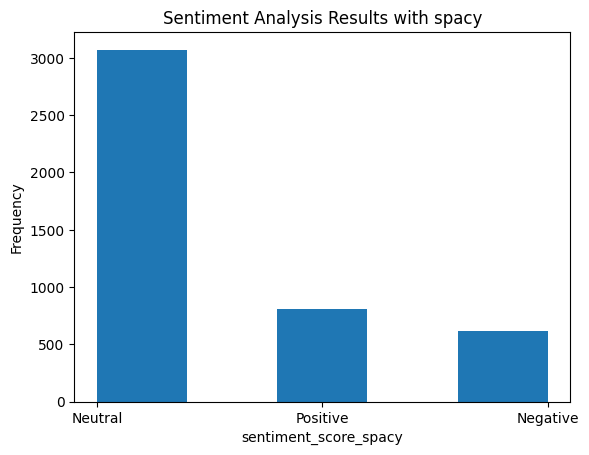

In [26]:
import matplotlib.pyplot as plt
# Create the histogram.
plt.hist(senti_list, bins=5)

# Add labels and title.
plt.xlabel("sentiment_score_spacy")
plt.ylabel("Frequency")
plt.title("Sentiment Analysis Results with spacy")

# Show the plot.
plt.show()

SentiWordNet avec NLTK

In [27]:
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
import nltk

# Download the SentiWordNet lexicon
nltk.download('sentiwordnet')

def calculate_sentiment(review):
    # Tokenize the review into words
    words = nltk.word_tokenize(review)

    sentiment = 0
    for word in words:
        # Find the synsets for each word
        synsets = wn.synsets(word)

        for synset in synsets:
            # Get the sentiment score for each synset
            senti_synset = swn.senti_synset(synset.name())
            sentiment += senti_synset.pos_score() - senti_synset.neg_score()

    return sentiment

reclamations['senti_scores_SentiWordNet'] = reclamations['DESCAferPreproc'].apply(calculate_sentiment)

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


In [28]:
reclamations['senti_scores_SentiWordNet']

0       0.000
1       0.000
2       0.875
3       1.375
4       1.375
        ...  
4493    0.250
4494   -1.000
4495    0.000
4496    0.000
4497    0.250
Name: senti_scores_SentiWordNet, Length: 4498, dtype: float64

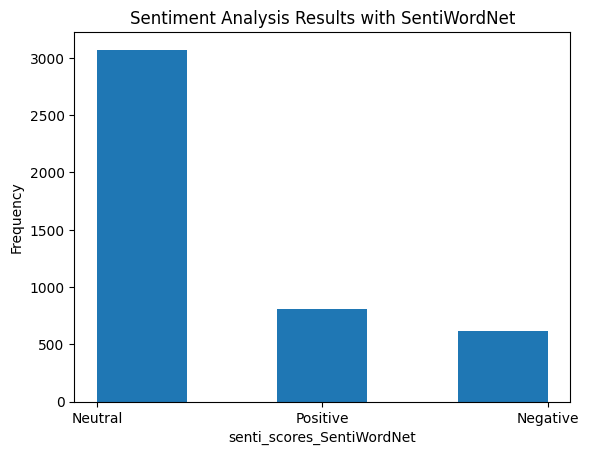

In [29]:
# Create the histogram.
plt.hist(senti_list, bins=5)

# Add labels and title.
plt.xlabel("senti_scores_SentiWordNet")
plt.ylabel("Frequency")
plt.title("Sentiment Analysis Results with SentiWordNet")

# Show the plot.
plt.show()

ROUTAGE DE DEPARTEMENT

In [30]:
departements=pd.read_csv("referenciel.csv")

In [31]:
departements

,_id,Mot_cles_2,Mot_cles_1,UNITE_TRAITANTE
0,662e825fad376649ac720c1b,CHEQUES,DIFFÈRENCE ENTRE LES DONNÈES FACIALE DU CHÈQUE...,BO_Dinars
1,662e825fad376649ac720c1c,CHEQUES,DIFFÈRENCE ENTRE LES DONNÈES FACIALE DU CHÈQUE...,BO_Dinars
2,662e825fad376649ac720c1d,CHEQUES,DÉPASSEMENT DENCAISSEMENT,BO_Dinars
3,662e825fad376649ac720c1e,CHEQUES,DÉPASSEMENT DENCAISSEMENT,BO_Dinars
4,662e825fad376649ac720c1f,CHEQUES,DÉPASSEMENT DENCAISSEMENT,BO_Dinars
...,...,...,...,...
767,662e825fad376649ac720f1a,IKRAM,Règlement sinistre,Assurance
768,662e825fad376649ac720f1b,IKRAM,Resiliation souscription,Assurance
769,662e825fad376649ac720f1c,IKRAM,Annulation : sans prélèvement,Assurance
770,662e825fad376649ac720f1d,IKRAM,Annulation : avec prélèvement,Assurance


In [32]:
departements.columns

Index(['_id', 'Mot_cles_2', 'Mot_cles_1', 'UNITE_TRAITANTE'], dtype='object')

In [33]:
from sklearn.cluster import KMeans
# Créer un vectorizer TF-IDF
vectorizer = TfidfVectorizer()

# Créer un modèle KMeans pour classer les réclamations dans les départements
kmeans = KMeans(n_clusters=len(departements['UNITE_TRAITANTE'].unique()), n_init=10, random_state=0)

In [34]:
# Pour chaque ligne du DataFrame des réclamations
for i, row in reclamations.iterrows():
    # Si TYPE_RECLAM est 'RECLAMATION'
    if row['TYPE_RECLAM'] == 'RECLAMATION':
        # Vectoriser le contenu DESCAferPreproc
        X = vectorizer.fit_transform(reclamations.loc[reclamations['TYPE_RECLAM'] == 'RECLAMATION', 'DESCAferPreproc'])

        # Utiliser KMeans pour prédire le département
        predicted_department = kmeans.fit_predict(X)

        # Affecter le département convenant à la colonne 'Departements'
        reclamations.loc[reclamations['TYPE_RECLAM'] == 'RECLAMATION', 'UNITE_TRAITANTE'] = [departements['UNITE_TRAITANTE'].unique()[i] for i in predicted_department]

In [35]:
reclamations.to_csv('reclamations_V1.csv', index=False)